In [11]:
from datasets import RFData, CameraData, SignalDataset, FuseDatasets
import numpy as np
import matplotlib.pyplot as plt
import os
import torch.nn as nn
import torch

In [4]:
data_path = "D:\osa_new_processed"
trial_folders = os.listdir(data_path)
thermal_file_name = "Thermal_Camera"
num_samps_oversample = 10
data_length = 9000
fs = 30
out_len = 1800
thermal_ext = ".tiff"

In [ ]:
samp_f=5e6
freq_slope=60.012e12
samples_per_chirp=256
num_tx = 3
num_rx = 4
radar_file_name = "FMCW_Radar.npy"
window_size = 5 # number of range bins to use



In [6]:
vital_dict_file_name = "gt_dict.pkl"
vital_key_radar = "CHEST"
vital_key_thermal = "AIR_flow"
l_freq_bpm = 5
u_freq_bpm = 30

In [9]:
dataset_gt_thermal = SignalDataset(data_path, trial_folders, vital_dict_file_name, vital_key_thermal, data_length, out_len, False, fs, 1024, False, l_freq_bpm, u_freq_bpm, num_samps_oversample, False)

In [10]:
fused_dataset_thermal = FuseDatasets([dataset_thermal, dataset_gt_thermal], ["thermal", "gt"])

In [12]:
data_loader = torch.utils.data.DataLoader(fused_dataset_thermal, batch_size=1, shuffle=True)

In [15]:
item = data_loader.__iter__().__next__()

In [24]:
item_thermal = item["thermal"]
item_gt = item["gt"]

In [25]:
item_thermal = item_thermal.numpy().squeeze()
item_gt = item_gt.numpy().squeeze()
print(item_thermal.shape)
item_thermal = np.mean(item_thermal, axis=1)
item_thermal = np.mean(item_thermal, axis=1)



(1800, 64, 64)


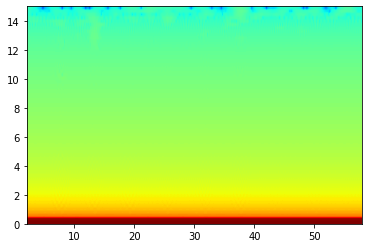

In [41]:
sp, _, _, _=plt.specgram(item_thermal, NFFT=128, Fs=fs, noverlap=127, cmap='jet')

In [42]:
sp.shape

(65, 1673)

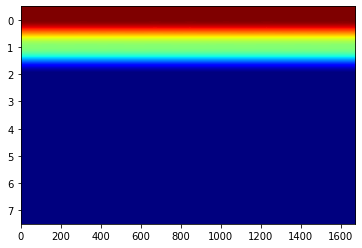

In [43]:
plt.imshow(sp[0:8], aspect='auto', cmap='jet')

In [13]:
for i, data in enumerate(data_loader):
    thermal, gt = data
    thermal = torch.mean(torch.mean(thermal, 1),1)
    spectrogram = torch.stft(thermal, 1024, 512, 1024, return_complex=True)
    spectrogram = torch.abs(spectrogram)

KeyboardInterrupt: 